# 4.1. Multiplayer Perceptrons

In [1]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
npx.set_np()

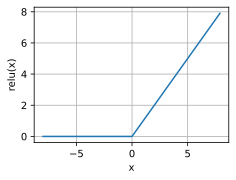

In [2]:
x = np.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = npx.relu(x)
d2l.set_figsize((4, 2.5))
d2l.plot(x, y, 'x', 'relu(x)')

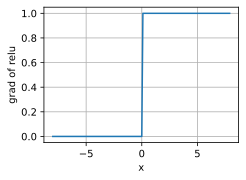

In [3]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of relu')

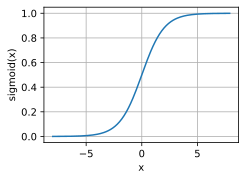

In [4]:
with autograd.record():
    y = npx.sigmoid(x)
d2l.plot(x, y, 'x', 'sigmoid(x)')

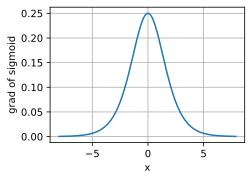

In [5]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of sigmoid')

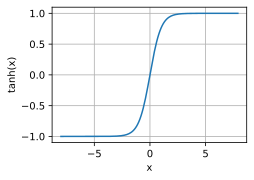

In [6]:
with autograd.record():
    y = np.tanh(x)
d2l.plot(x, y, 'x', 'tanh(x)')

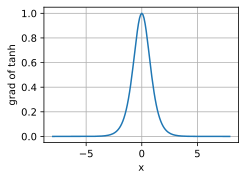

In [7]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of tanh')

The multilayer perceptron adds one or multiple fully-connected hidden layers between the output and input layers and transforms the output of the hidden layer via an activation function.

Commonly-used activation functions include the ReLU function, the sigmoid function, and the tanh function.

# 4.2. Implementation of Multilayer Perceptron from Scratch

In [26]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [27]:
from d2l import mxnet as d2l
from mxnet import gluon, np, npx
npx.set_np()

In [28]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [29]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)
W3 = np.random.normal(scale=0.01, size=(num_hiddens, 64))
b3 = np.zeros(64)
W2 = np.random.normal(scale=0.01, size=(64, num_outputs))
b2 = np.zeros(num_outputs)
params = [W1, b1, W2, b2, W3, b3]

for param in params:
    param.attach_grad()

In [30]:
def relu(X):
    return np.maximum(X, 0)

Can learn this by vector notation

In [34]:
def net(X):
    X = X.reshape(-1, num_inputs)
    H = relu(np.dot(X, W1) + b1)
    H2 = relu(np.dot(H, W3) + b3)
    return np.dot(H2, W2) + b2

In [35]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

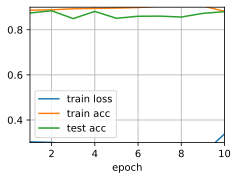

In [38]:
num_epochs, lr = 10, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

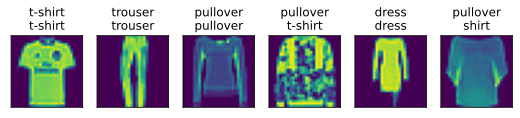

In [39]:
d2l.predict_ch3(net, test_iter)

# 4.3. Concise Implementation of Multiplayer Perceptron

In [51]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [52]:
from d2l import mxnet as d2l
from mxnet import gluon, init, npx
from mxnet.gluon import nn
npx.set_np()

In [66]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'),
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

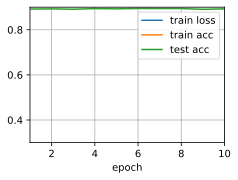

In [69]:
batch_size, num_epochs = 256, 10
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

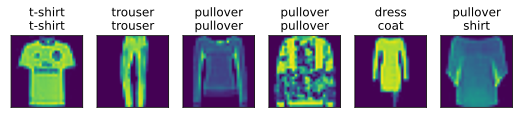

In [70]:
d2l.predict_ch3(net, test_iter)

# 4.4. Model Selection, Underfitting and Overfitting

In this section, to give you some intuition, we’ll focus on a few factors that tend to influence the generalizability of a model class:

1. **The number of tunable parameters.** When the number of tunable parameters, sometimes called the degrees of freedom, is large, models tend to be more susceptible to overfitting.

2. **The values taken by the parameters.** When weights can take a wider range of values, models can be more susceptible to overfitting.

3. **The number of training examples.** It’s trivially easy to overfit a dataset containing only one or two examples even if your model is simple. But overfitting a dataset with millions of examples requires an extremely flexible model.

In [71]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [72]:
from d2l import mxnet as d2l
from mxnet import gluon, np, npx
from mxnet.gluon import nn
npx.set_np()

In [73]:
maxdegree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(maxdegree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
features = np.random.shuffle(features)
poly_features = np.power(features, np.arange(maxdegree).reshape(1, -1))
poly_features = poly_features / (
    npx.gamma(np.arange(maxdegree) + 1).reshape(1, -1))
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [74]:
features[:2], poly_features[:2], labels[:2]

(array([[0.40358585],
        [1.0108472 ]]),
 array([[1.0000000e+00, 4.0358585e-01, 8.1440769e-02, 1.0956113e-02,
         1.1054332e-03, 8.9227447e-05, 6.0018215e-06, 3.4603576e-07,
         1.7456891e-08, 7.8281714e-10, 3.1593395e-11, 1.1591499e-12,
         3.8984698e-14, 1.2102826e-15, 3.4889499e-17, 9.3872726e-19,
         2.3678567e-20, 5.6213723e-22, 1.2603924e-23, 2.6772445e-25],
        [1.0000000e+00, 1.0108472e+00, 5.1090604e-01, 1.7214932e-01,
         4.3504164e-02, 8.7952130e-03, 1.4817694e-03, 2.1397749e-04,
         2.7037317e-05, 3.0367332e-06, 3.0696731e-07, 2.8208827e-08,
         2.3762339e-09, 1.8476998e-10, 1.3341016e-11, 8.9904868e-13,
         5.6800054e-14, 3.3774215e-15, 1.8966985e-16, 1.0090906e-17]]),
 array([5.2211957, 5.4490194]))

In [75]:
def evaluate_loss(net, data_iter, loss):  #@save
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # sum_loss, num_examples
    for X, y in data_iter:
        metric.add(loss(net(X), y).sum(), y.size)
    return metric[0] / metric[1]

In [76]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=1000):
    loss = gluon.loss.L2Loss()
    net = nn.Sequential()
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net.add(nn.Dense(1, use_bias=False))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    test_iter = d2l.load_array((test_features, test_labels), batch_size,
                               is_train=False)
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': 0.01})
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(1, num_epochs+1):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch % 50 == 0:
            animator.add(epoch, (evaluate_loss(net, train_iter, loss),
                                 evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data().asnumpy())

weight: [[ 4.989778   1.2199774 -3.4050174  5.568829 ]]


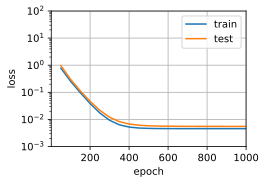

In [77]:
# Pick the first four dimensions, i.e., 1, x, x^2, x^3 from the polynomial
# features
train(poly_features[:n_train, 0:4], poly_features[n_train:, 0:4],
      labels[:n_train], labels[n_train:])

weight: [[ 4.480256   3.6749477 -1.6922524]]


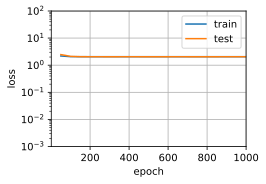

In [78]:
# Pick the first four dimensions, i.e., 1, x from the polynomial features
train(poly_features[:n_train, 0:3], poly_features[n_train:, 0:3],
      labels[:n_train], labels[n_train:])

weight: [[ 4.9794421e+00  1.3407180e+00 -3.2958481e+00  4.9496698e+00
  -4.7229233e-01  1.5880253e+00  1.1348372e-01  3.4782398e-01
   1.0370315e-02  5.9577826e-02 -2.6409042e-03 -1.0824277e-02
   3.8452402e-02  2.2184050e-02  5.0048240e-02 -4.2172626e-02
  -6.3810110e-02 -3.9141634e-03 -4.5659434e-02 -1.7158300e-02]]


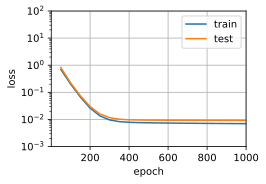

In [79]:
n_subset = 100  # Subset of data to train on
n_degree = 20  # Degree of polynomials
train(poly_features[1:n_subset, 0:n_degree],
      poly_features[n_train:, 0:n_degree], labels[1:n_subset],
      labels[n_train:])

# 4.5. Weight Decay

How do you decide which wieghts to take out?

In [80]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
npx.set_np()

n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = np.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [81]:
def init_params():
    w = np.random.normal(scale=1, size=(num_inputs, 1))
    b = np.zeros(1)
    w.attach_grad()
    b.attach_grad()
    return [w, b]

In [82]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [83]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], legend=['train', 'test'])
    for epoch in range(1, num_epochs + 1):
        for X, y in train_iter:
            with autograd.record():
                # The L2 norm penalty term has been added, and broadcasting
                # makes l2_penalty(w) a vector whose length is batch_size
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        if epoch % 5 == 0:
            animator.add(epoch, (d2l.evaluate_loss(net, train_iter, loss),
                                 d2l.evaluate_loss(net, test_iter, loss)))
    print('l1 norm of w:', np.abs(w).sum())

l1 norm of w: 152.94403


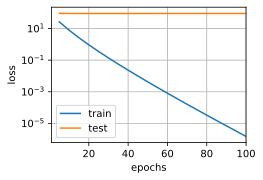

In [84]:
train(lambd=0)

l1 norm of w: 4.1275005


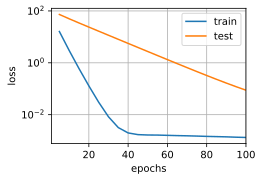

In [85]:
train(lambd=3)

In [87]:
def train_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    loss = gluon.loss.L2Loss()
    num_epochs, lr = 100, 0.003
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': lr, 'wd': wd})
    # The bias parameter has not decayed. Bias names generally end with "bias"
    net.collect_params('.*bias').setattr('wd_mult', 0)

    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], legend=['train', 'test'])
    for epoch in range(1, num_epochs+1):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        if epoch % 5 == 0:
            animator.add(epoch, (d2l.evaluate_loss(net, train_iter, loss),
                                 d2l.evaluate_loss(net, test_iter, loss)))
    print('L1 norm of w:', np.abs(net[0].weight.data()).sum())

L1 norm of w: 4.506031


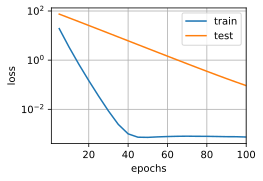

In [91]:
train_gluon(3)

L1 norm of w: 0.25332725


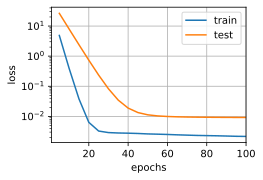

In [92]:
train_gluon(10)

# 4.6. Dropout

In [99]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [100]:
from d2l import mxnet as d2l
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
npx.set_np()

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # In this case, all elements are dropped out
    if dropout == 1:
        return np.zeros_like(X)
    # In this case, all elements are kept
    if dropout == 0:
        return X
    mask = np.random.uniform(0, 1, X.shape) > dropout
    return mask.astype(np.float32) * X / (1.0-dropout)

In [101]:
X = np.arange(16).reshape(2, 8)
print(dropout_layer(X, 0))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1))

[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]]
[[ 0.  2.  4.  0.  0. 10.  0.  0.]
 [ 0. 18.  0.  0. 24.  0.  0. 30.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [102]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens1))
b1 = np.zeros(num_hiddens1)
W2 = np.random.normal(scale=0.01, size=(num_hiddens1, num_hiddens2))
b2 = np.zeros(num_hiddens2)
W3 = np.random.normal(scale=0.01, size=(num_hiddens2, num_outputs))
b3 = np.zeros(num_outputs)

params = [W1, b1, W2, b2, W3, b3]
for param in params:
    param.attach_grad()

In [103]:
dropout1, dropout2 = 0.2, 0.5

def net(X):
    X = X.reshape(-1, num_inputs)
    H1 = npx.relu(np.dot(X, W1) + b1)
    # Use dropout only when training the model
    if autograd.is_training():
        # Add a dropout layer after the first fully connected layer
        H1 = dropout_layer(H1, dropout1)
    H2 = npx.relu(np.dot(H1, W2) + b2)
    if autograd.is_training():
        # Add a dropout layer after the second fully connected layer
        H2 = dropout_layer(H2, dropout2)
    return np.dot(H2, W3) + b3

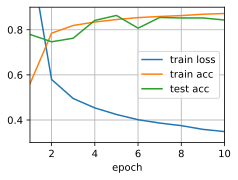

In [104]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = gluon.loss.SoftmaxCrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

In [105]:
net = nn.Sequential()
net.add(nn.Dense(256, activation="relu"),
        # Add a dropout layer after the first fully connected layer
        nn.Dropout(dropout1),
        nn.Dense(256, activation="relu"),
        # Add a dropout layer after the second fully connected layer
        nn.Dropout(dropout2),
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

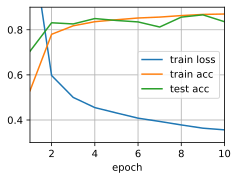

In [106]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

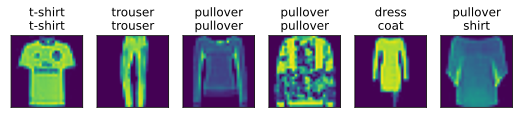

In [107]:
d2l.predict_ch3(net, test_iter)

# 4.7. Forward propagation, backward propapagtion, and Computational Graphs

In [108]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Lot of gradients and derivatices to calculate how changing each weights affects the  the cost function or loss function.

# 4.8 Numerical Stability and initialization

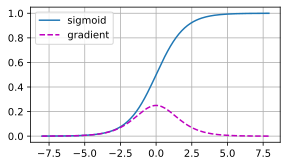

In [109]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
npx.set_np()

x = np.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = npx.sigmoid(x)
y.backward()

d2l.plot(x, [y, x.grad], legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [110]:
M = np.random.normal(size=(4, 4))
print('A single matrix', M)
for i in range(100):
    M = np.dot(M, np.random.normal(size=(4, 4)))

print('After multiplying 100 matrices', M)

A single matrix [[ 1.0811     -0.40545598  1.1131498   1.8684496 ]
 [ 0.45637363  1.4292082   0.52298236  1.2406116 ]
 [ 1.1998312   0.97526985 -1.150885   -0.24416605]
 [-2.4002328  -0.897713   -0.48249874  1.1218845 ]]
After multiplying 100 matrices [[ 3.7884465e+24 -1.5442290e+24  3.1433373e+24  9.7713989e+23]
 [ 1.2216382e+24 -4.9795851e+23  1.0136135e+24  3.1509190e+23]
 [-2.4270156e+24  9.8928880e+23 -2.0137352e+24 -6.2599062e+23]
 [ 1.7241796e+24 -7.0280200e+23  1.4305805e+24  4.4471086e+23]]
